### Module 3 InClass Assignment 

1. Load the dataset bike_day_raw.csv, which has the regression target cnt. This dataset is hourly bike rentals in the citybike platform. The cnt column is the number of rentals, which we want to predict from date and weather data.

- Split the data into a training and a test set using train_test_split. 

- Use the LinearRegression class to learn a regression model on this data. 

- You can evaluate with the score method, which provides the R^2or using the mean_squared_error function from sklearn.metrics (Challenge: You can also write it yourself in numpy).


In [1]:
import pandas as pd
df = pd.read_csv('bike_day_raw.csv')

In [2]:
df.shape

(731, 11)

In [3]:
df.columns

Index(['season', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit',
       'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [4]:
df.head(5)

,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985
1,1,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801
2,1,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349
3,1,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562
4,1,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600


In [5]:
X = df.drop(['cnt'], axis=1)

In [6]:
y = df['cnt']

In [7]:
from sklearn.model_selection import train_test_split
# is it stratify, test_size, and should random_state be 0, 1, 42, or something else?
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [8]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()

In [9]:
lr_model.fit(X_train, y_train)

LinearRegression()

In [10]:
lr_model.score(X_test, y_test)

0.4805286755477689

In [11]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, lr_model.predict(X_test))

2209385.736497235

2. Load the diabetes dataset using sklearn.datasets.load_diabetes.
- Scale the dataset (you can be creative and make pipelines)
- Apply LinearRegression, 
- Apply Ridge and do grid search 
- Apply Lasso and do grid search
- Visualize the coefficients.


In [12]:
from sklearn.datasets import load_diabetes

In [13]:
X = load_diabetes().data
y = load_diabetes().target

In [14]:
from sklearn.pipeline import Pipeline

In [15]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
import numpy as np

In [16]:
linear_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('linear', LinearRegression())
])

In [17]:
linear_pipeline.fit(X, y) # linear regression fit

Pipeline(steps=[('scaler', StandardScaler()), ('linear', LinearRegression())])

In [18]:
ridge_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('ridge', Ridge())
])

In [19]:
ridge_params = {'ridge__alpha': np.logspace(-3, 3, 7)}
ridge_grid_search = GridSearchCV(ridge_pipeline, ridge_params, cv=5)

In [20]:
ridge_grid_search.fit(X, y)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('ridge', Ridge())]),
             param_grid={'ridge__alpha': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])})

In [21]:
lasso_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('lasso', Lasso())
])

In [22]:
lasso_params = {'lasso__alpha': np.logspace(-3, 3, 7)}
lasso_grid_search = GridSearchCV(lasso_pipe, lasso_params, cv=5)

In [23]:
lasso_grid_search.fit(X, y)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('lasso', Lasso())]),
             param_grid={'lasso__alpha': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])})

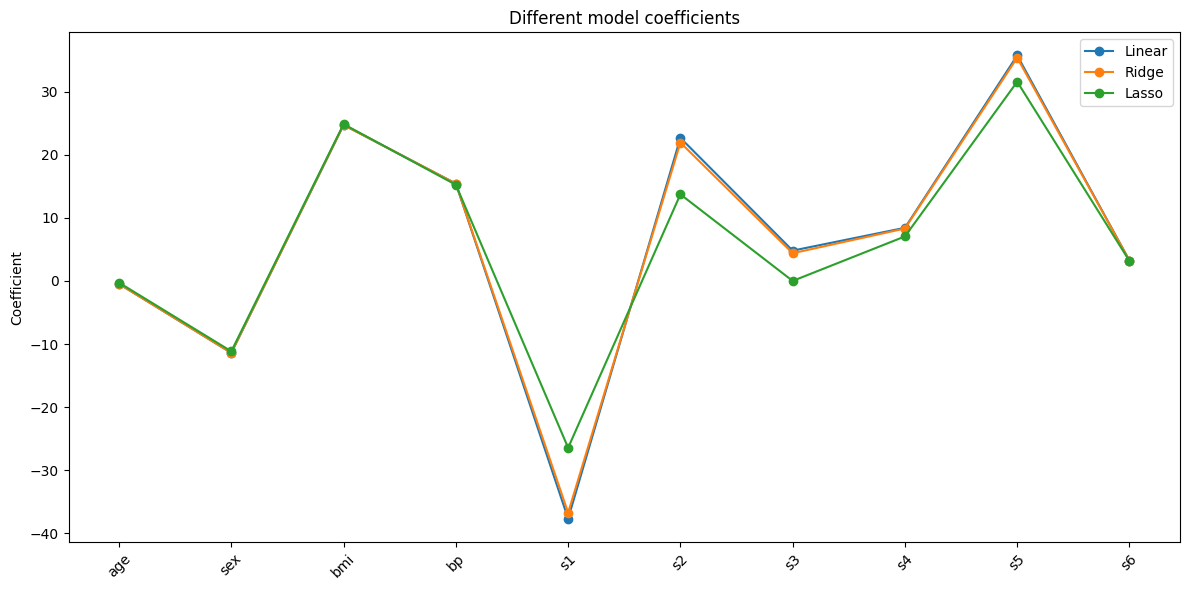

In [27]:
import matplotlib.pyplot as plt
linear_coefficient = linear_pipeline.named_steps['linear'].coef_
ridge_coefficient = ridge_grid_search.best_estimator_.named_steps['ridge'].coef_
lasso_coefficient = lasso_grid_search.best_estimator_.named_steps['lasso'].coef_

plt.figure(figsize=(12, 6))
plt.plot(load_diabetes().feature_names, linear_coefficient, 'o-', label='Linear')
plt.plot(load_diabetes().feature_names, ridge_coefficient, 'o-', label='Ridge')
plt.plot(load_diabetes().feature_names, lasso_coefficient, 'o-', label='Lasso')

plt.xticks(rotation=45)
plt.ylabel('Coefficient')
plt.title('Different model coefficients')
plt.legend()
plt.tight_layout()
plt.show()